<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Декодирование-данных" data-toc-modified-id="Декодирование-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Декодирование данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

В проекте необходимо защитить данные клиентов страховой компании. Планируется разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Требуется обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Набор данных находится в файле insurance.csv. 

	• Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
    • Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [25]:
# загрузим необходимые библиотеки
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.metrics import r2_score

In [3]:
# загрузим данные
path_1 = 'insurance.csv'
path_2 = '/datasets/insurance.csv'

if os.path.exists(path_1):
    data = pd.read_csv(path_1)
elif os.path.exists(path_2):
    data = pd.read_csv(path_2)
else:
    print('Something is wrong')


In [4]:
# изучим данные
data.tail()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Данные и необходимые библиотеки загружены. Размер датафрейма 5000 х 4. Пропусков не обнаружено.

In [19]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


В таблице практически равномерно распределены данные между мужсинами и женщинами. Средний возраст застрахованного составляет 31 год, при этом медиана составляет 30 лет. Границы по возрасту от 18 до 65 лет. Средняя зарплата 40 тыс. руб.  

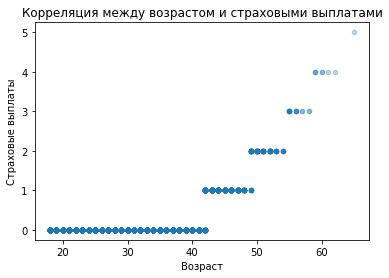

In [26]:
# посмотрим зависимость между возрастом и страховыми выплатами
data.plot(x='Возраст', y='Страховые выплаты', kind='scatter', alpha=0.3)
plt.title('Корреляция между возрастом и страховыми выплатами')
plt.show()

In [28]:
print('Коэффициент корреляции пирсона между возрастом и страховыми выплатами', round(data['Возраст'].corr(data['Страховые выплаты']), 2))

Коэффициент корреляции пирсона между возрастом и страховыми выплатами 0.65


Возраст и количество страховых выплат клиенту за последние 5 лет имеют достаточно высокую корреляцию . Чем старше застрахованное лицо, тем более вероятно он потребует страховку чаще, следовательно, несёт в себе больше рисков для компании.

## Умножение матриц 

Необходимо проработать вопрос, если признаки умножают на обратимую матрицу, то изменится ли качество линейной регрессии?

Заказчику требуется обосновать решение.

Предварительно видны следующие варианты:

    a. Изменится. В этом случае необходимо привести примеры матриц.
    
    b. Не изменится. Потребуется указать, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)
$$
a = Xw
$$

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Если признаки умножаются на обратимую матрицу качество линейной регрессии не изменится



**Обоснование:** 
    
$
Z = XP
$

$X$ - матрица признаков в сокращенной записи (1й столбец из единиц)

$P$ - обратимая (а значит квадратная) матрица на которую умножается матрица признаков

$
a = Xw
$

$
w = (X^T X)^{-1} X^T y
$

$
a1 = Zw1
$

$
w1 = (Z^T Z)^{-1} Z^T y = ((XP)^T XP)^{-1} (XP)^T y = (P^TX^TXP)^{-1} (XP)^T y  
= P^{-1}(X^TX)^{-1}(P^T)^{-1} (XP)^T y 
$

Для обоснования нашего утверждения докажем равенство 
$
a = a1
$

$
Xw = Zw1
$

$
X(X^T X)^{-1} X^T y = XP P^{-1}(X^TX)^{-1}(P^T)^{-1} (XP)^T y 
$

$
X X^T  = XP P^{-1}(P^T)^{-1} (XP)^T 
$


$
X^T  = P P^{-1}(P^T)^{-1} (XP)^T 
$

$
X^T  = (P^T)^{-1} (XP)^T 
$

$
X^T  = (P^T)^{-1}  P^T X^T 
$

$
X^T  =  X^T 
$

Равенство верно, соответственно, наше утверждение доказано!
Если признаки умножаются на обратимую матрицу качество линейной регрессии не изменится.

## Алгоритм преобразования

В качестве алгоритма преобразования предлагается умножение матрицы признаков на обратимую квадратную матрицу размерами по числу полей матрицы признаков. Выше доказано, что предсказания а равны предсказаниям а1.

**Алгоритм**

Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии не отличается до и после преобразования. Применим метрику R2.

In [6]:
class LinearRegression:
    
    '''Класс линейной регрессии'''
    def fit(self, X, y):
        '''Метод обучения модели для матрицы признаков'''
        # Формируем матрицу X с первым единичным полем
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)        
        # вектов весов для матрицы признаков
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        
    def fit_encryption(self, X, y):
        '''Метод обучения модели для матрицы зашифрованных данных'''
        # Формируем матрицу X с первым единичным полем
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        # Формируем рандомную квадратную матрицу 5 на 5
        self.P = np.random.normal(0, 100, (5,5))
        #  матрица зашифрованных данных
        Z = X @ self.P
        self.w = np.linalg.inv(Z.T @ Z) @ Z.T @ y


    def predict(self, features):
        '''Метод получения прогноза для матрицы признаков'''
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
        a = X @ self.w
        return a
    
    def predict_encryption(self, features):
        '''Метод получения прогноза для матрицы зашифрованных данных'''
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)        
        Z = X @ self.P
        a_1 = Z @ self.w
        return a_1


    
        

In [7]:
class LinearRegression_2:
    
    '''Класс линейной регрессии'''
    def fit(self, X, y):
        '''Метод обучения модели для матрицы признаков'''
        # Формируем матрицу X с первым единичным полем
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)        
        # вектов весов для матрицы признаков
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        
    def fit_encryption(self, X, y):
        '''Метод обучения модели для матрицы зашифрованных данных'''

        # Формируем рандомную квадратную матрицу 4 на 4
        self.P = np.random.normal(0, 100, (4,4))
        # проверка на обратимость Р
        try:
            p_inv = np.linalg.inv(self.P)
            #  матрица зашифрованных данных
            Z = X @ self.P
            # добавляем 1 в пепрвое поле для соответствия условию краткой записи
            Z = np.concatenate((np.ones((Z.shape[0], 1)), Z), axis=1)
            self.w = np.linalg.inv(Z.T @ Z) @ Z.T @ y
        except:
            print('Матрица p необратима')

    def predict(self, X):
        '''Метод получения прогноза для матрицы признаков'''
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        a = X @ self.w
        return a
    
    def predict_encryption(self, X):
        '''Метод получения прогноза для матрицы зашифрованных данных'''
        # Зашифровываем данные        
        self.Z = X @ self.P
        # добавляем 1 в пепрвое поле для соответствия условию краткой записи
        self.Z_ = np.concatenate((np.ones((self.Z.shape[0], 1)), self.Z), axis=1)
        a_1 = self.Z_ @ self.w
        return a_1
      

**Обоснование**
В основе описанного алгоритма лежит доказанное выше утверждение

что при Z = X @ P, прогнозы будут равны
$
a = a1 
$

## Проверка алгоритма

In [8]:
# подготовим неободимые объекты
features = data.drop('Страховые выплаты', axis = 1)
target = data['Страховые выплаты']

In [9]:
# прогнозная модель для матрицы признаков
model = LinearRegression()
model.fit(features, target)
predictions_X = model.predict(features)
predictions_X

array([ 0.51172715,  0.68431581,  0.09373365, ..., -0.25697046,
       -0.19099161,  0.04904991])

In [10]:
# Показатель r2 модели матрицы признаков
round(r2_score(target, predictions_X), 3)

0.425

In [11]:
# прогнозная модель для зашифрованной матрицы
model.fit_encryption(features, target)
predictions_Z = model.predict_encryption(features)
predictions_Z


array([ 0.51019254,  0.69344337,  0.08860965, ..., -0.25440319,
       -0.1969594 ,  0.04045638])

In [12]:
# Показатель r2 модели матрицы зашифрованных данных
round(r2_score(target, predictions_Z), 3)

0.425

Проверка алгоритма по классу LinearRegression_2

In [13]:
# прогнозная модель для матрицы признаков
model_2 = LinearRegression_2()
model_2.fit(features, target)
predictions_X = model_2.predict(features)
predictions_X

array([ 0.51172715,  0.68431581,  0.09373365, ..., -0.25697046,
       -0.19099161,  0.04904991])

In [14]:
# Показатель r2 модели матрицы признаков
round(r2_score(target, predictions_X), 3)

0.425

In [15]:
# прогнозная модель для зашифрованной матрицы
model_2.fit_encryption(features, target)
predictions_Z = model_2.predict_encryption(features)
predictions_Z

array([ 0.51172716,  0.68431576,  0.09373363, ..., -0.25697049,
       -0.19099158,  0.04904993])

In [16]:
# Показатель r2 модели матрицы зашифрованных данных
round(r2_score(target, predictions_Z), 3)

0.425

Показатели r2 модели матрицы признаков и модели на зашифрованных данных совпали. Это подтверждает наше утвержение что умножение на матрицы признаков на случайную квадратную матрицу зашифровывает данные и не влияет на качество оценки модели машинного обучения.

## Декодирование данных

In [17]:
# Расшифруем данные
X_new = model_2.Z @ np.linalg.inv(model_2.P)
X_new.tail()

,0,1,2,3
4995,5.456968e-12,28.0,35700.0,2.0
4996,1.091394e-11,34.0,52400.0,1.0
4997,7.275958e-12,20.0,33900.0,2.0
4998,1.000000e+00,22.0,32700.0,3.0
4999,1.000000e+00,28.0,40600.0,1.0


In [18]:
# Сверим расшифрованные данные с оригиналом
count = 0
for i in range(len(X_new)):
    if (np.round(X_new.values[i], 0) == np.round(features.values[i],0)).all() == True:
        pass
    else:
        count += 1
        break
if count > 0:
    print('Данные после расшифровки не совпали с оригиналом')
else:
    print('Данные после расшифровки совпали с оригиналом')

Данные после расшифровки совпали с оригиналом


## Вывод

В данном проекте в качестве алгоритма шифрования предлагается умножение матрицы признаков на обратимую квадратную матрицу. Приведено теоретическое обоснование  данного алгоритма. В основе описанного алгоритма лежит доказанное выше утверждение
что при Z = X @ P, прогнозы будут равны 𝑎=𝑎1

 Предложены два варианта его реализации. На практике подтверждено, что шифрование данных не повлияло на качество прогноза линейной регрессии. Для оценки применялась метрика качества R2. 

В предложенных вариантах алгоритма подробно расписан метод линейной регрессии с вычислением вектора коэффициентов, и получением прогноза на основе скалярного произведения матрицы признаков с данным вектором.

Показатели r2 модели матрицы признаков и модели на зашифрованных данных совпали. Это подтверждает наше утверждение, что умножение на матрицы признаков на случайную квадратную матрицу зашифровывает данные, и не влияет на качество оценки модели машинного обучения.
Также удалось успешно расшифровать матрицу признаков.  Данные после расшифровки совпали с оригиналом.